# Taller 2 punto 2

## Importando librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
import plotly.express as px
import plotly.graph_objects as go


## 2.1.

### Selecting Dataset
 - Body Fat Prediction Dataset

In [2]:
df=pd.read_csv("data/bodyfat.csv")
df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

### Chosing 4 continous variables

In [3]:
#df=pd.read_csv("bodyfat.csv")
df=df[["BodyFat","Weight","Height","Abdomen"]]
df.head()

BodyFat  Weight  Height  Abdomen
0     12.3  154.25   67.75     85.2
1      6.1  173.25   72.25     83.0
2     25.3  154.00   66.25     87.9
3     10.4  184.75   72.25     86.4
4     28.7  184.25   71.25    100.0

### Calculating means vector

In [4]:
variable_means=df.mean()
variable_means

BodyFat     19.150794
Weight     178.924405
Height      70.148810
Abdomen     92.555952
dtype: float64

### Calculating Covariance Matrix

In [5]:
covariance_matrix_df = df.cov()
covariance_matrix_df

# Convert the DataFrame to a numpy array
covariance_matrix = np.matrix(covariance_matrix_df.to_numpy())
covariance_matrix

matrix([[ 70.0358161 , 150.62337697,  -2.74334566,  73.40475621],
        [150.62337697, 863.72271877,  33.1856467 , 281.41054141],
        [ -2.74334566,  33.1856467 ,  13.41651252,   3.46833381],
        [ 73.40475621, 281.41054141,   3.46833381, 116.2747453 ]])

### Calculating Inverse of Covariance Matrix

In [6]:
I_covariance_matrix=covariance_matrix.I
I_covariance_matrix

matrix([[ 0.05119364,  0.00669411,  0.00650316, -0.04871398],
        [ 0.00669411,  0.00820238, -0.01279405, -0.02369597],
        [ 0.00650316, -0.01279405,  0.10134889,  0.02383584],
        [-0.04871398, -0.02369597,  0.02383584,  0.09599214]])

### Exploring Data

#### Statistics metrics of data

In [7]:
df.describe()

BodyFat      Weight      Height     Abdomen
count  252.000000  252.000000  252.000000  252.000000
mean    19.150794  178.924405   70.148810   92.555952
std      8.368740   29.389160    3.662856   10.783077
min      0.000000  118.500000   29.500000   69.400000
25%     12.475000  159.000000   68.250000   84.575000
50%     19.200000  176.500000   70.000000   90.950000
75%     25.300000  197.000000   72.250000   99.325000
max     47.500000  363.150000   77.750000  148.100000

#### Creating a pairplot for each couple of variables with the mean

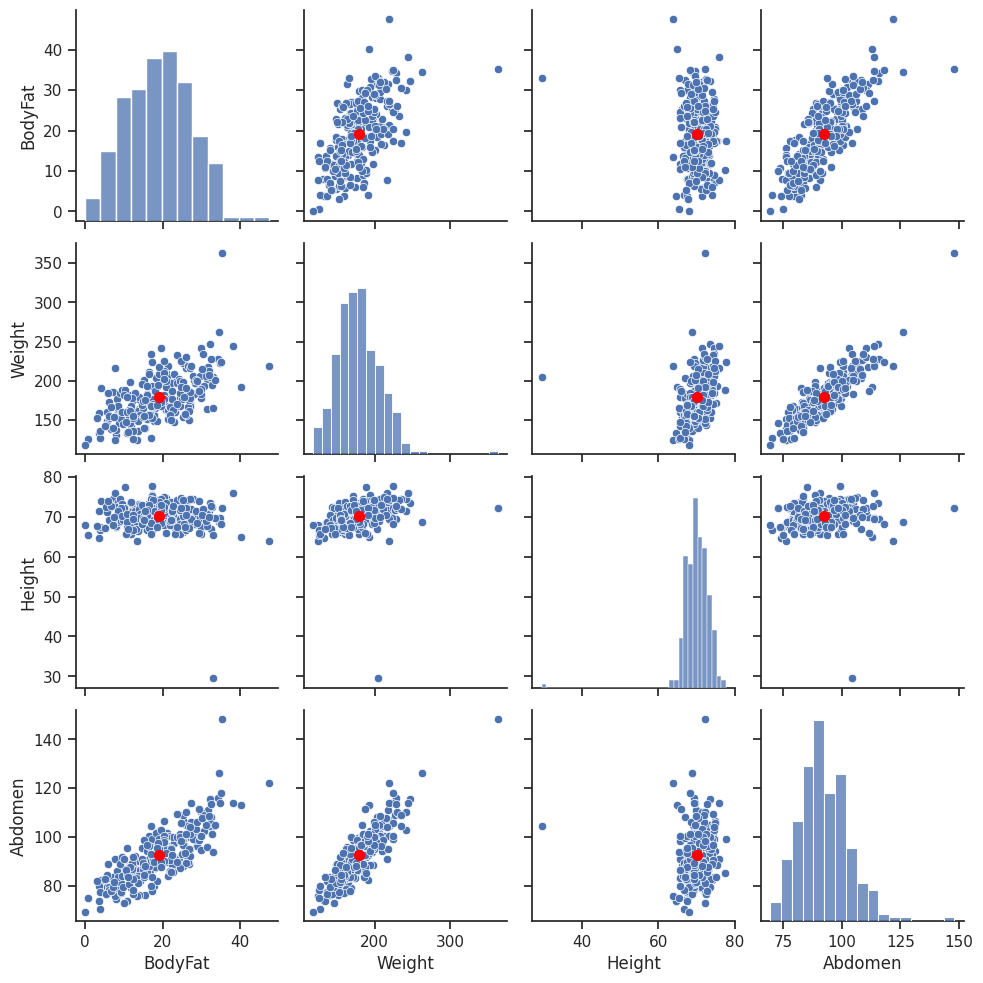

In [8]:

#plt.figure(figsize=(10,10))
sns.set(style="ticks")
g = sns.pairplot(df)

# Add points representing means of each variable pair
for i, ax_row in enumerate(g.axes):
    for j, ax in enumerate(ax_row):
        if i != j:
            ax.scatter(variable_means.iloc[j], variable_means.iloc[i], color='red', marker='o', s=50)

        
plt.show()

## 2.2. Recentering Data

In [9]:
z = df - variable_means
z

BodyFat     Weight   Height    Abdomen
0    -6.850794 -24.674405 -2.39881  -7.355952
1   -13.050794  -5.674405  2.10119  -9.555952
2     6.149206 -24.924405 -3.89881  -4.655952
3    -8.750794   5.825595  2.10119  -6.155952
4     9.549206   5.325595  1.10119   7.444048
..         ...        ...      ...        ...
247  -8.150794 -44.674405 -3.14881  -8.955952
248  14.449206  22.075595 -0.39881  12.444048
249  10.149206   7.825595 -4.14881  18.944048
250   6.849206  11.825595  0.35119   8.744048
251  12.749206  28.575595 -0.14881  15.944048

[252 rows x 4 columns]

In [10]:
zT = z.T
zT

0          1          2         3         4          5    \
BodyFat  -6.850794 -13.050794   6.149206 -8.750794  9.549206   1.749206   
Weight  -24.674405  -5.674405 -24.924405  5.825595  5.325595  31.325595   
Height   -2.398810   2.101190  -3.898810  2.101190  1.101190   4.601190   
Abdomen  -7.355952  -9.555952  -4.655952 -6.155952  7.444048   1.844048   

              6         7          8          9    ...        242        243  \
BodyFat  0.049206 -6.750794 -15.050794  -7.450794  ...  11.249206  13.449206   
Weight   2.075595 -2.924405  12.075595  19.325595  ...  55.325595  48.825595   
Height  -0.398810  2.351190   3.851190   3.351190  ...   1.851190   2.601190   
Abdomen -1.855952 -4.055952 -10.055952  -3.955952  ...  16.444048  20.844048   

               244        245        246        247        248        249  \
BodyFat   9.849206  -3.950794  11.049206  -8.150794  14.449206  10.149206   
Weight   20.575595 -23.424405  36.575595 -44.674405  22.075595   7.825595   
Height   -1.648810  -0.898810   0.351190  -3.148810  -0.398810  -4.148810   
Abdomen  13.544048  -8.255952  15.044048  -8.955952  12.444048  18.944048   

               250        251  
BodyFat   6.849206  12.749206  
Weight   11.825595  28.575595  
Height    0.351190  -0.148810  
Abdomen   8.744048  15.944048  

[4 rows x 252 columns]

In [11]:
ZTZ=zT@z
ZTZ

BodyFat         Weight       Height       Abdomen
BodyFat  17578.989841   37806.467619  -688.579762  18424.593810
Weight   37806.467619  216794.402411  8329.597321  70634.045893
Height    -688.579762    8329.597321  3367.544643    870.551786
Abdomen  18424.593810   70634.045893   870.551786  29184.961071

In [12]:
n=len(df)
cov_Z=ZTZ.apply(lambda value: value/ (n-1),axis=1)
cov_Z

BodyFat      Weight     Height     Abdomen
BodyFat   70.035816  150.623377  -2.743346   73.404756
Weight   150.623377  863.722719  33.185647  281.410541
Height    -2.743346   33.185647  13.416513    3.468334
Abdomen   73.404756  281.410541   3.468334  116.274745

In [13]:
covariance_matrix

matrix([[ 70.0358161 , 150.62337697,  -2.74334566,  73.40475621],
        [150.62337697, 863.72271877,  33.1856467 , 281.41054141],
        [ -2.74334566,  33.1856467 ,  13.41651252,   3.46833381],
        [ 73.40475621, 281.41054141,   3.46833381, 116.2747453 ]])

In [14]:
#Dif between cov_Z and covarianceMatrix

covariance_matrix-np.matrix(cov_Z)

matrix([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### The relationship between `ZTZ` and the covariance matrix is ​​that when the observations are centered, the matrix ZTZ divided by n-1 is equal to the covariance matrix of the original observations. This is due to the way the Z matrix is ​​obtained by subtracting the mean of each observation.

## 2.3. Pairplot of variables with colors according to Mahalanobis Distance with means vector

### Malhalanobis distance

We can calculate this distance using `scipy.spatial.distance.malhalanobis`. The details of the distance and the parameters of the functions were finded here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html

![Alt text](image.png)

### Creating column with Mahalanobis Distance

In [15]:
# Calcular la distancia de Mahalanobis para cada observación
mahalanobis_distances = []
for _, row in df.iterrows():
    observation = row.values
    mahalanobis_distance = distance.mahalanobis(observation, variable_means, np.linalg.inv(covariance_matrix_df))
    mahalanobis_distances.append(mahalanobis_distance)

# Agregar las distancias de Mahalanobis al DataFrame
df['Mahalanobis Distance'] = mahalanobis_distances
df

BodyFat  Weight  Height  Abdomen  Mahalanobis Distance
0       12.3  154.25   67.75     85.2              1.210689
1        6.1  173.25   72.25     83.0              1.859856
2       25.3  154.00   66.25     87.9              1.989363
3       10.4  184.75   72.25     86.4              1.698064
4       28.7  184.25   71.25    100.0              1.611502
..       ...     ...     ...      ...                   ...
247     11.0  134.25   67.00     83.6              2.314263
248     33.6  201.00   69.75    105.0              1.792601
249     29.3  186.75   66.00    111.5              3.716335
250     26.0  190.75   70.50    101.3              1.149306
251     31.9  207.50   70.00    108.5              1.695672

[252 rows x 5 columns]

### Plotting scatterplot with colors based on Mahalanobis Distance

#### First, we do it for two variables `BodyFat` and `Weight`.

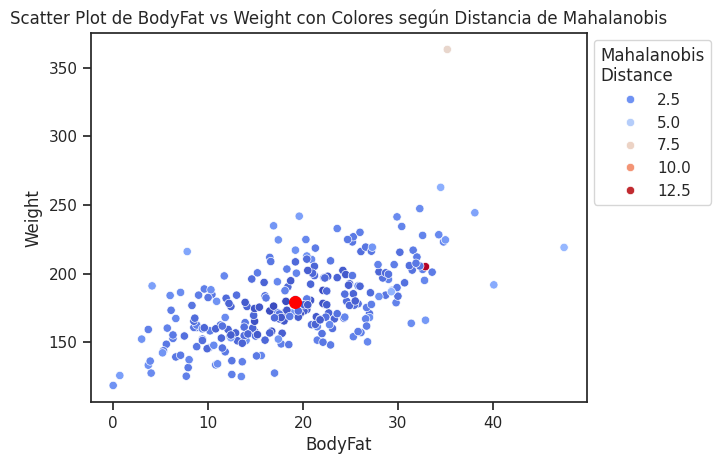

In [16]:
# Crear una gráfica de dispersión de dos variables, coloreando por distancia de Mahalanobis
sns.scatterplot(x='BodyFat', y='Weight', data=df, hue='Mahalanobis Distance',palette="coolwarm")
plt.scatter(variable_means.iloc[0], variable_means.iloc[1], color='red', marker='o', s=70)

# Mover la leyenda fuera del espacio de graficación
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title("Mahalanobis\nDistance")

plt.xlabel('BodyFat')
plt.ylabel('Weight')
plt.title('Scatter Plot de BodyFat vs Weight con Colores según Distancia de Mahalanobis')
plt.show()

### Now, the process is done for each pair of variables:

#### - **Using `seaborn`**

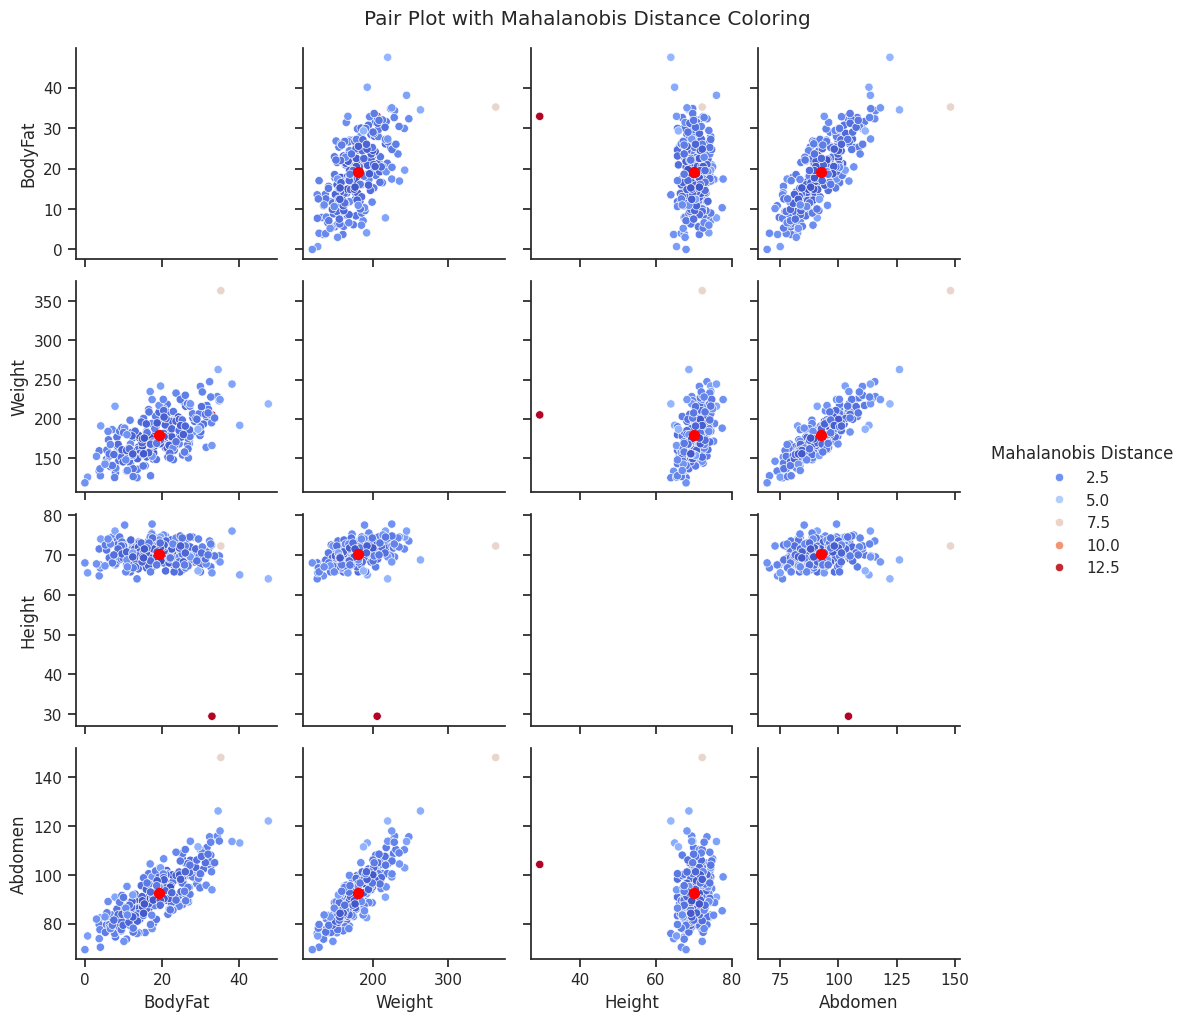

In [17]:
# Create a pair plot with color based on Mahalanobis distance
sns.set(style="ticks")
pairplot = sns.pairplot(df, hue="Mahalanobis Distance", palette="coolwarm")
pairplot.fig.suptitle("Pair Plot with Mahalanobis Distance Coloring", y=1.02)

# Add points representing means of each variable pair
for i, ax_row in enumerate(pairplot.axes):
    for j, ax in enumerate(ax_row):
        if i != j:
            ax.scatter(variable_means.iloc[j], variable_means.iloc[i], color='red', marker='o', s=50)
plt.show()


#### - **Using `plotly express`**

In [18]:

fig = px.scatter_matrix(df, dimensions=['BodyFat', 'Weight', 'Height', 'Abdomen'], color='Mahalanobis Distance')

# Update axis labels and title
fig.update_layout(
    title='Interactive Pair Plot with Mahalanobis Distance Coloring'
)

# Expand the size of the plot
fig.update_layout(
    width=1200,
    height=1000
)

# Show the interactive plot
fig.show()

### 2.4. Plotting contour of distance of Mahalanobis of radius 1 with center in the intercept of means for each pair of variables

#### **Doing the proces for `BodyFat` and `Weight`**

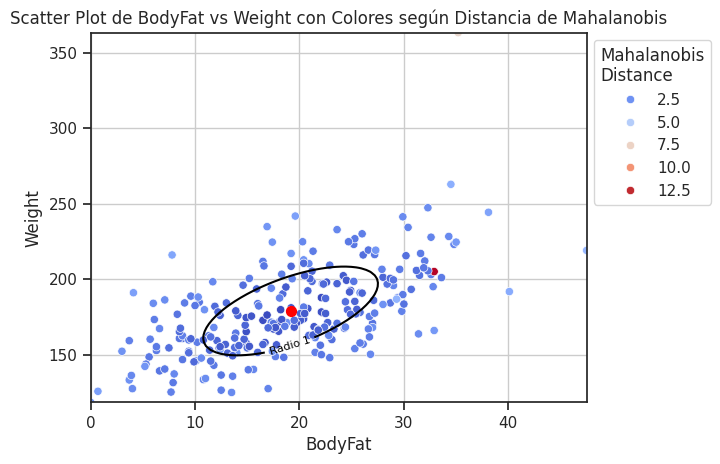

In [19]:
# Calcular el vector de medias
means_vector = df.mean().values

# Calcular la matriz de covarianzas
cov_matrix = df.cov().values

# Crear una gráfica de dispersión de dos variables, coloreando por distancia de Mahalanobis
sns.scatterplot(x='BodyFat', y='Weight', data=df, hue='Mahalanobis Distance', palette="coolwarm")
plt.scatter(means_vector[0], means_vector[1], color='red', marker='o', s=50)

# Calcular la cuadrícula para el contorno de la distancia de Mahalanobis
x_min, x_max = df['BodyFat'].min(), df['BodyFat'].max()
y_min, y_max = df['Weight'].min(), df['Weight'].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.zeros_like(xx)

# Calcular la distancia de Mahalanobis para cada punto en la cuadrícula
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        difference = point - means_vector[:2]  # Usar solo las dos primeras variables
        mahalanobis_distance = distance.mahalanobis(point, means_vector[:2], np.linalg.inv(cov_matrix[:2, :2]))
        Z[i, j] = mahalanobis_distance

# Dibujar el contorno de la distancia de Mahalanobis con radio 1
contours = plt.contour(xx, yy, Z, levels=[1], colors='black')
plt.clabel(contours, inline=True, fontsize=8, fmt='Radio 1')

plt.xlabel('BodyFat')
plt.ylabel('Weight')
plt.title('Scatter Plot de BodyFat vs Weight con Colores según Distancia de Mahalanobis')
# Mover la leyenda fuera del espacio de graficación
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title("Mahalanobis\nDistance")

#plt.legend()
plt.grid()
plt.show()


#### **Doing the process for each pair of variables**

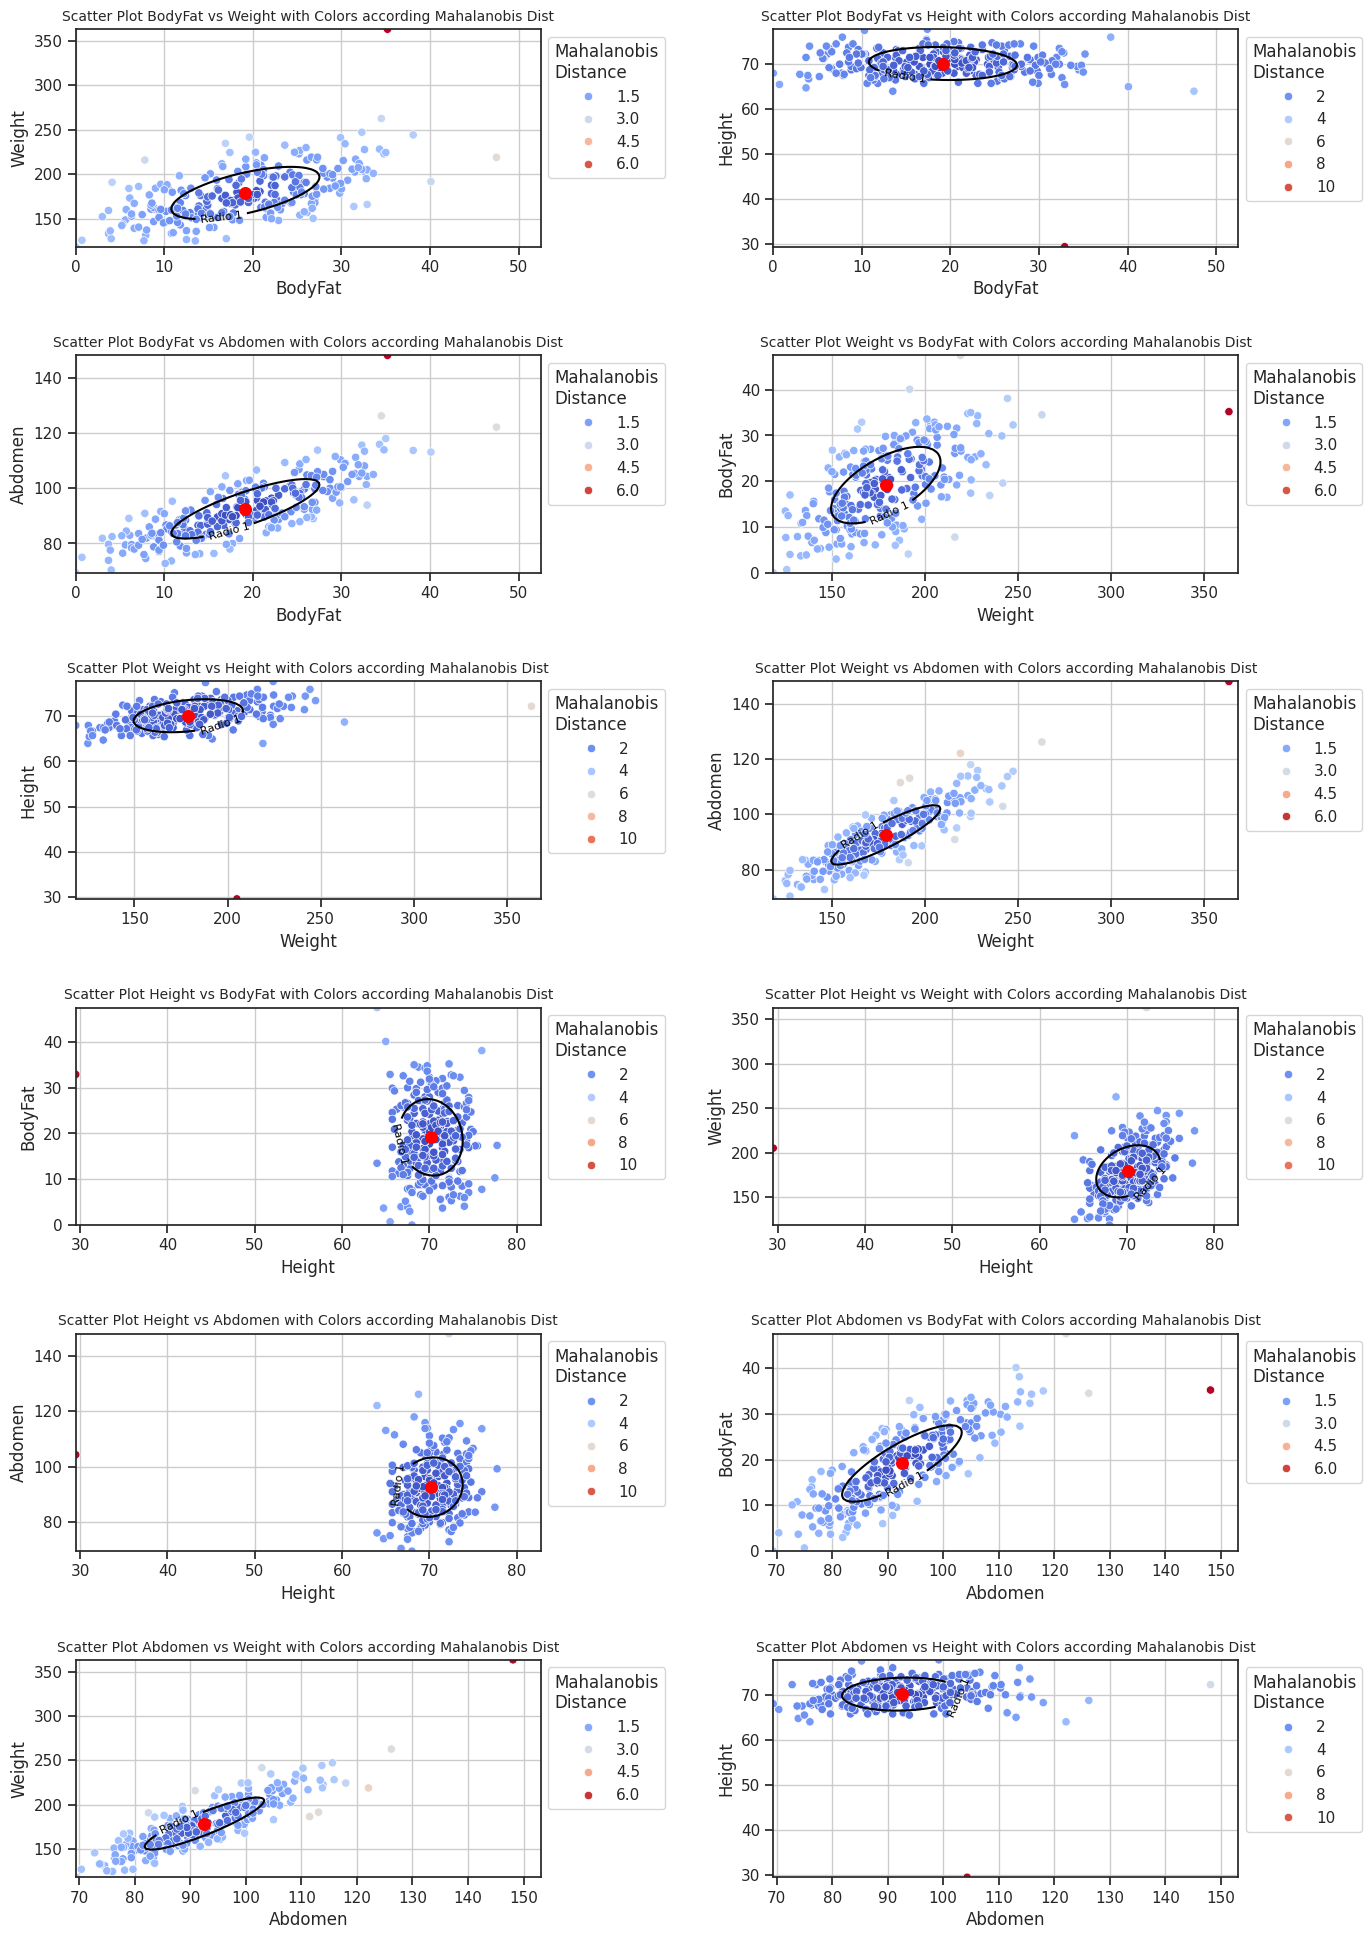

In [20]:
#df=pd.read_csv("bodyfat.csv")
df=df[["BodyFat","Weight","Height","Abdomen"]]

# Obtener nombres de las columnas de tu DataFrame
variable_names = df.columns

# Crear todas las combinaciones de pares de variables
variable_combinations = [(var1, var2) for var1 in variable_names for var2 in variable_names if var1 != var2]

# Configurar la disposición de subplots
num_rows = len(variable_combinations) // 2
if len(variable_combinations) % 2 != 0:
    num_rows += 1

# Crear una figura con subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()

for idx, (var_x, var_y) in enumerate(variable_combinations):
    # Calcular el vector de medias
    means_vector = df[[var_x, var_y]].mean().values

    # Calcular la matriz de covarianzas
    cov_matrix = df[[var_x, var_y]].cov().values

    # Calcular la distancia de Mahalanobis para cada observación
    mahalanobis_distances = []
    for _, row in df.iterrows():
        observation = row[[var_x, var_y]].values
        mahalanobis_distance = distance.mahalanobis(observation, means_vector, np.linalg.inv(cov_matrix))
        mahalanobis_distances.append(mahalanobis_distance)

    # Agregar las distancias de Mahalanobis al DataFrame
    df['Mahalanobis Distance'] = mahalanobis_distances

    # Crear una gráfica de dispersión de dos variables, coloreando por distancia de Mahalanobis
    sns.scatterplot(x=var_x, y=var_y, data=df, hue='Mahalanobis Distance', palette="coolwarm", ax=axes[idx])
    axes[idx].scatter(means_vector[0], means_vector[1], color='red', marker='o', s=70)

    # Calcular la cuadrícula para el contorno de la distancia de Mahalanobis
    x_min, x_max = df[var_x].min(), df[var_x].max()+5
    y_min, y_max = df[var_y].min(), df[var_y].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.zeros_like(xx)

    # Calcular la distancia de Mahalanobis para cada punto en la cuadrícula
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            point = np.array([xx[i, j], yy[i, j]])
            difference = point - means_vector
            mahalanobis_distance = distance.mahalanobis(point, means_vector, np.linalg.inv(cov_matrix))
            Z[i, j] = mahalanobis_distance

    # Dibujar el contorno de la distancia de Mahalanobis con radio 1
    contours = axes[idx].contour(xx, yy, Z, levels=[1], colors='black')
    axes[idx].clabel(contours, inline=True, fontsize=8, fmt='Radio 1')

    axes[idx].set_xlabel(var_x)
    axes[idx].set_ylabel(var_y)
    axes[idx].set_title(f'Scatter Plot {var_x} vs {var_y} with Colors according Mahalanobis Dist', size=10)
    #axes[idx].legend()8
    legend = axes[idx].legend(loc=("upper left"), bbox_to_anchor=(1, 1))
    legend.set_title("Mahalanobis\nDistance")
    axes[idx].grid()

# Eliminar subplots no utilizados
for i in range(len(variable_combinations), len(axes)):
    fig.delaxes(axes[i])

plt.show()
